In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
model = models.Marinescu2018()

In [3]:
model.print_citations()

Marinescu, M. et al. Irreversible vs Reversible Capacity Fade of Lithium-Sulfur Batteries during Cycling: The Effects of Precipitation and Shuttle. J. Electrochem. Soc. 165, A6107–A6118 (2018).


In [4]:
# Experiment: cycle 3.4Ah cell at 0.3C for one hour (same conditions for charge and discharge)

multicycle = 10*['Discharge at 1.02 A for 1 hour',
                'Charge at 1.02 A for 1 hour']

experiment = pybamm.Experiment(multicycle)

sim = pybamm.Simulation(
    model=model,
    experiment = experiment,
    solver=pybamm.CasadiSolver(
        #atol=1e-12,
        #rtol=1e-12,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)


In [5]:
sim.solve()

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


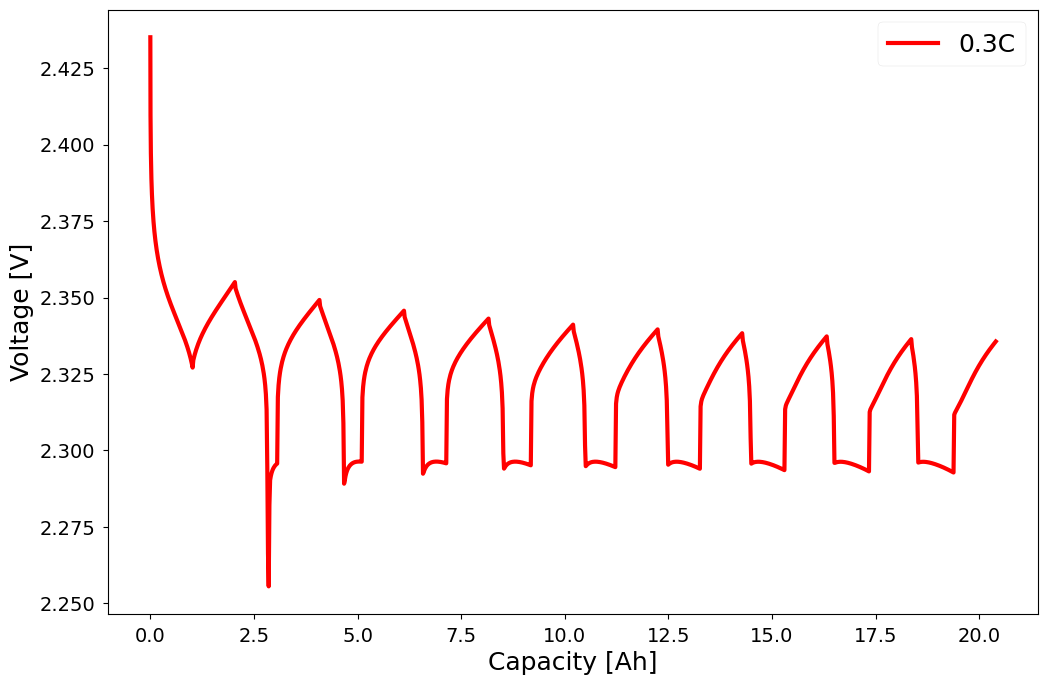

In [6]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.3C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

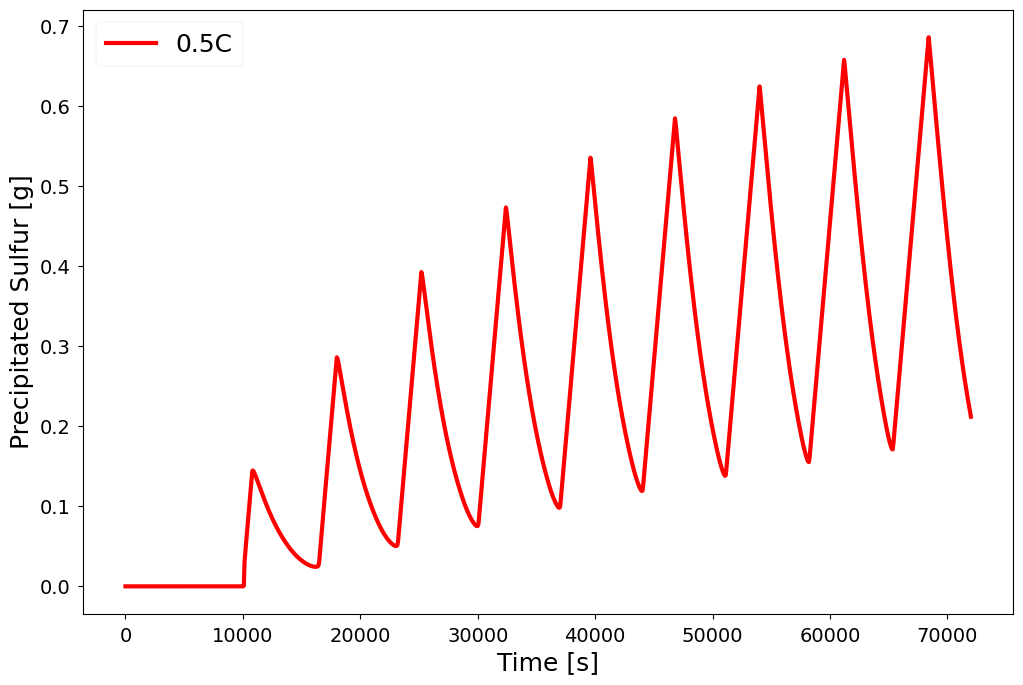

In [7]:
# See Figure 7(e) of Marinescu et al. (2018)
time = sim.solution.t
Sp = sim.solution["Precipitated Sulfur [g]"].entries
plt.plot(time, Sp)

plt.xticks
plt.legend(["0.5C",])
plt.xlabel('Time [s]')
plt.ylabel('Precipitated Sulfur [g]');